In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# read nc file
ds = xr.open_dataset("/Users/opopligher1996/workspace/master/BusinessIntelligenceTechniquesAndApplications_DSME6756/project/ConvLSTM-CNN-for-tropical-cyclone/Section_1/windspeed_timeseries/2023_04_25T12_00_2023_04_30T12_00_0_30_118_150_gfs.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:    (time: 41, latitude: 61, longitude: 65)
Coordinates:
  * time       (time) datetime64[ns] 2023-04-25T12:00:00 ... 2023-04-30T12:00:00
  * latitude   (latitude) float64 0.0 0.5 1.0 1.5 2.0 ... 28.5 29.0 29.5 30.0
  * longitude  (longitude) float64 118.0 118.5 119.0 119.5 ... 149.0 149.5 150.0
Data variables:
    tmpsfc     (time, latitude, longitude) float32 ...
    tmp2m      (time, latitude, longitude) float32 ...
    ugrd10m    (time, latitude, longitude) float32 ...
    vgrd10m    (time, latitude, longitude) float32 ...
    pratesfc   (time, latitude, longitude) float32 ...
    rh2m       (time, latitude, longitude) float32 ...
    prmslmsl   (time, latitude, longitude) float32 ...
    dlwrfsfc   (time, latitude, longitude) float32 ...
    dswrfsfc   (time, latitude, longitude) float32 ...
Attributes: (12/63)
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    acknowledgement:            The Pacific Islands Ocean Observing System (P...
    cdm_data_type:              Grid
    Conventions:                CF-1.6, ACDD-1.3
    creator_email:              ncep.list.pmb-dataflow@lstsrv.ncep.noaa.gov
    creator_institution:        NOAA National Centers for Environmental Predi...
    ...                         ...
    testOutOfDate:              now+136hours
    time_coverage_end:          2023-04-30T12:00:00Z
    time_coverage_resolution:   PT3H
    time_coverage_start:        2023-04-25T12:00:00Z
    title:                      NOAA/NCEP Global Forecast System (GFS) Atmosp...
    Westernmost_Easting:        118.0

In [3]:
ds_windspeed = np.sqrt(ds.ugrd10m**2+ds.vgrd10m**2)
ds_windspeed

<xarray.DataArray (time: 41, latitude: 61, longitude: 65)>
array([[[ 2.6154041 ,  3.6004012 ,  3.8650315 , ...,  5.699688  ,
          5.693026  ,  5.6425905 ],
        [ 3.2971685 ,  4.9653163 ,  4.6728735 , ...,  5.585361  ,
          5.71503   ,  5.3403025 ],
        [ 0.91439694,  1.104025  ,  2.8378472 , ...,  5.6064544 ,
          5.5644608 ,  5.3866673 ],
        ...,
        [ 1.6792766 ,  0.6553807 ,  4.272725  , ..., 10.585466  ,
         10.598756  , 10.399343  ],
        [ 1.3502442 ,  1.3260734 ,  1.3840533 , ..., 10.374789  ,
         10.500144  , 10.611857  ],
        [ 1.1124581 ,  1.0536255 ,  1.1267699 , ..., 12.663158  ,
         12.2940035 , 11.475163  ]],

       [[ 2.0022454 ,  3.4755983 ,  3.672063  , ...,  5.2270656 ,
          5.3589563 ,  5.599639  ],
        [ 2.1726549 ,  3.829519  ,  3.7732646 , ...,  5.280317  ,
          5.2524095 ,  5.7363787 ],
        [ 0.80120975,  0.88280797,  2.4918623 , ...,  5.5841794 ,
          5.549727  ,  5.430943  ],
...
        [ 1.151671  ,  2.6375008 ,  1.8498193 , ...,  6.3748727 ,
          7.6382565 ,  8.453158  ],
        [ 1.1613265 ,  1.4199352 ,  0.63762516, ...,  7.0819597 ,
          6.7587886 ,  7.4606357 ],
        [ 1.2667322 ,  1.4833947 ,  0.6605718 , ...,  7.770994  ,
          7.8179045 ,  7.230898  ]],

       [[ 4.005216  ,  4.139043  ,  4.4911466 , ...,  4.238434  ,
          4.511575  ,  4.579754  ],
        [ 3.1741614 ,  3.920353  ,  4.2914667 , ...,  4.4053497 ,
          4.5915337 ,  4.9392495 ],
        [ 0.16055538,  0.35147083,  3.8594644 , ...,  4.5641108 ,
          4.88239   ,  4.949776  ],
        ...,
        [ 0.8192998 ,  0.6743674 ,  1.0298377 , ...,  7.7976804 ,
          8.01103   ,  7.369197  ],
        [ 0.06577737,  1.1438417 ,  0.8442494 , ...,  8.12086   ,
          7.770823  ,  7.308904  ],
        [ 0.5264347 ,  0.67652804,  1.7363638 , ...,  8.125358  ,
          7.8698316 ,  7.4532385 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2023-04-25T12:00:00 ... 2023-04-30T12:00:00
  * latitude   (latitude) float64 0.0 0.5 1.0 1.5 2.0 ... 28.5 29.0 29.5 30.0
  * longitude  (longitude) float64 118.0 118.5 119.0 119.5 ... 149.0 149.5 150.0

In [4]:
#tw_ds_windspeed = ds_windspeed.sel(latitude=slice(0,40), longitude=slice(118,150),time=slice("2022-05-01", "2022-05-02"))
tw_ds_windspeed = ds_windspeed.sel(latitude=slice(0,40), longitude=slice(118,150))
tw_ds_windspeed

<xarray.DataArray (time: 41, latitude: 61, longitude: 65)>
array([[[ 2.6154041 ,  3.6004012 ,  3.8650315 , ...,  5.699688  ,
          5.693026  ,  5.6425905 ],
        [ 3.2971685 ,  4.9653163 ,  4.6728735 , ...,  5.585361  ,
          5.71503   ,  5.3403025 ],
        [ 0.91439694,  1.104025  ,  2.8378472 , ...,  5.6064544 ,
          5.5644608 ,  5.3866673 ],
        ...,
        [ 1.6792766 ,  0.6553807 ,  4.272725  , ..., 10.585466  ,
         10.598756  , 10.399343  ],
        [ 1.3502442 ,  1.3260734 ,  1.3840533 , ..., 10.374789  ,
         10.500144  , 10.611857  ],
        [ 1.1124581 ,  1.0536255 ,  1.1267699 , ..., 12.663158  ,
         12.2940035 , 11.475163  ]],

       [[ 2.0022454 ,  3.4755983 ,  3.672063  , ...,  5.2270656 ,
          5.3589563 ,  5.599639  ],
        [ 2.1726549 ,  3.829519  ,  3.7732646 , ...,  5.280317  ,
          5.2524095 ,  5.7363787 ],
        [ 0.80120975,  0.88280797,  2.4918623 , ...,  5.5841794 ,
          5.549727  ,  5.430943  ],
...
        [ 1.151671  ,  2.6375008 ,  1.8498193 , ...,  6.3748727 ,
          7.6382565 ,  8.453158  ],
        [ 1.1613265 ,  1.4199352 ,  0.63762516, ...,  7.0819597 ,
          6.7587886 ,  7.4606357 ],
        [ 1.2667322 ,  1.4833947 ,  0.6605718 , ...,  7.770994  ,
          7.8179045 ,  7.230898  ]],

       [[ 4.005216  ,  4.139043  ,  4.4911466 , ...,  4.238434  ,
          4.511575  ,  4.579754  ],
        [ 3.1741614 ,  3.920353  ,  4.2914667 , ...,  4.4053497 ,
          4.5915337 ,  4.9392495 ],
        [ 0.16055538,  0.35147083,  3.8594644 , ...,  4.5641108 ,
          4.88239   ,  4.949776  ],
        ...,
        [ 0.8192998 ,  0.6743674 ,  1.0298377 , ...,  7.7976804 ,
          8.01103   ,  7.369197  ],
        [ 0.06577737,  1.1438417 ,  0.8442494 , ...,  8.12086   ,
          7.770823  ,  7.308904  ],
        [ 0.5264347 ,  0.67652804,  1.7363638 , ...,  8.125358  ,
          7.8698316 ,  7.4532385 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2023-04-25T12:00:00 ... 2023-04-30T12:00:00
  * latitude   (latitude) float64 0.0 0.5 1.0 1.5 2.0 ... 28.5 29.0 29.5 30.0
  * longitude  (longitude) float64 118.0 118.5 119.0 119.5 ... 149.0 149.5 150.0

Save  2023_04_25_12_00_00 .jpg
Save  2023_04_25_15_00_00 .jpg
Save  2023_04_25_18_00_00 .jpg
Save  2023_04_25_21_00_00 .jpg
Save  2023_04_26_00_00_00 .jpg
Save  2023_04_26_03_00_00 .jpg
Save  2023_04_26_06_00_00 .jpg
Save  2023_04_26_09_00_00 .jpg
Save  2023_04_26_12_00_00 .jpg
Save  2023_04_26_15_00_00 .jpg
Save  2023_04_26_18_00_00 .jpg
Save  2023_04_26_21_00_00 .jpg
Save  2023_04_27_00_00_00 .jpg
Save  2023_04_27_03_00_00 .jpg
Save  2023_04_27_06_00_00 .jpg
Save  2023_04_27_09_00_00 .jpg
Save  2023_04_27_12_00_00 .jpg
Save  2023_04_27_15_00_00 .jpg
Save  2023_04_27_18_00_00 .jpg
Save  2023_04_27_21_00_00 .jpg
Save  2023_04_28_00_00_00 .jpg
Save  2023_04_28_03_00_00 .jpg


/var/folders/g6/yjkwxgqx3xn42nf4x5kcpmzw0000gn/T/ipykernel_5536/986766510.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(400/my_dpi, 300/my_dpi), dpi=my_dpi)


Save  2023_04_28_06_00_00 .jpg
Save  2023_04_28_09_00_00 .jpg
Save  2023_04_28_12_00_00 .jpg
Save  2023_04_28_15_00_00 .jpg
Save  2023_04_28_18_00_00 .jpg
Save  2023_04_28_21_00_00 .jpg
Save  2023_04_29_00_00_00 .jpg
Save  2023_04_29_03_00_00 .jpg
Save  2023_04_29_06_00_00 .jpg
Save  2023_04_29_09_00_00 .jpg
Save  2023_04_29_12_00_00 .jpg
Save  2023_04_29_15_00_00 .jpg
Save  2023_04_29_18_00_00 .jpg
Save  2023_04_29_21_00_00 .jpg
Save  2023_04_30_00_00_00 .jpg
Save  2023_04_30_03_00_00 .jpg
Save  2023_04_30_06_00_00 .jpg
Save  2023_04_30_09_00_00 .jpg
Save  2023_04_30_12_00_00 .jpg


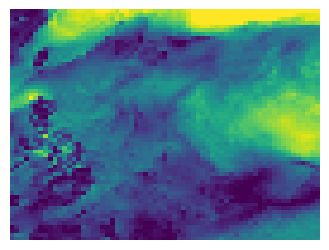

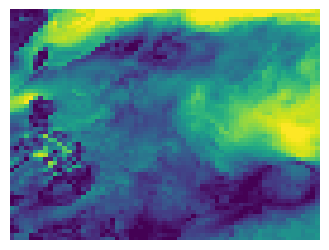

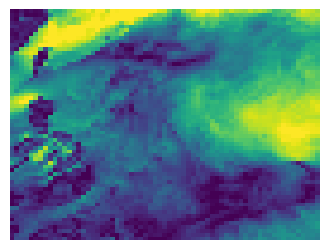

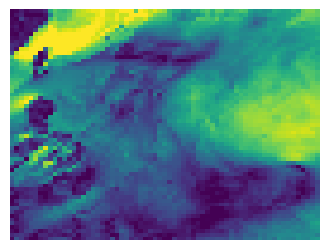

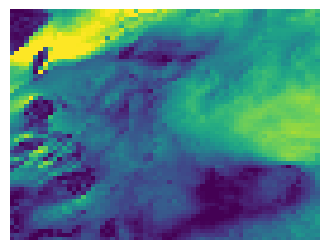

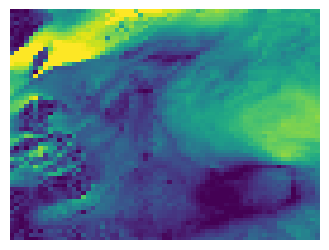

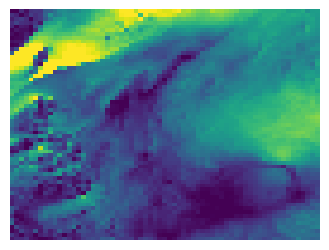

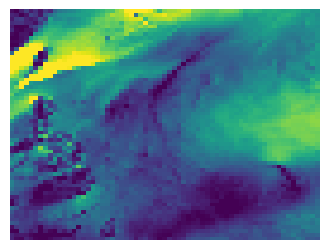

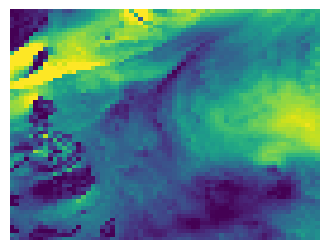

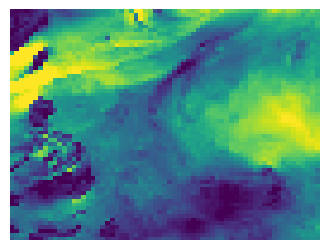

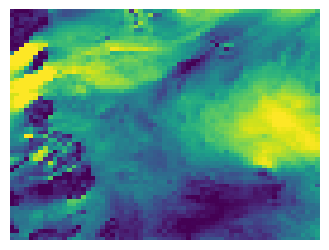

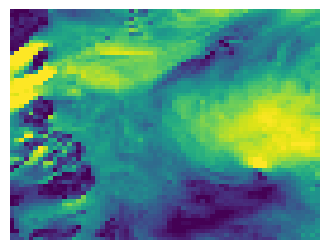

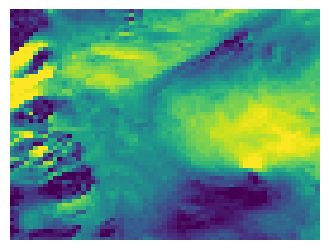

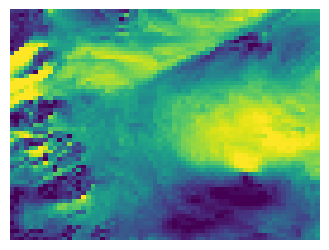

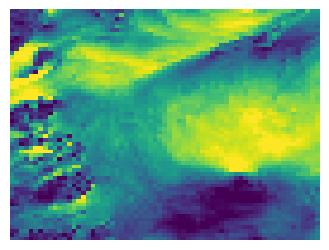

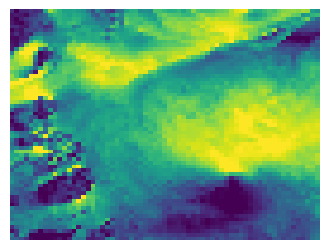

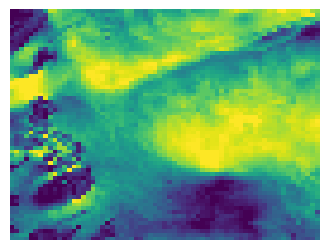

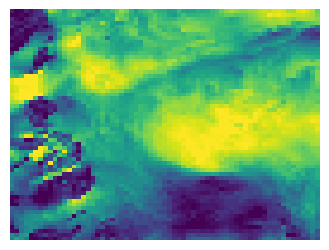

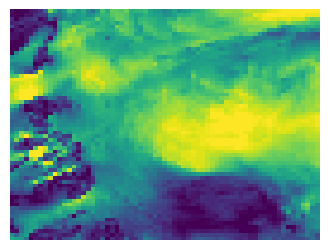

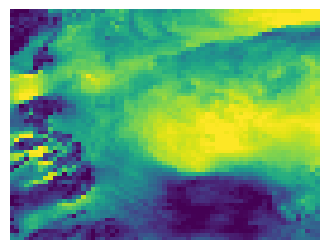

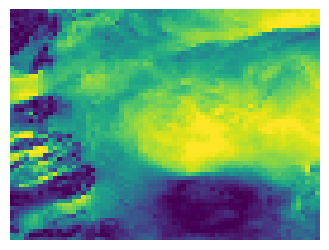

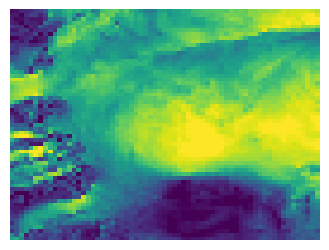

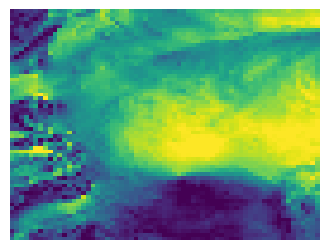

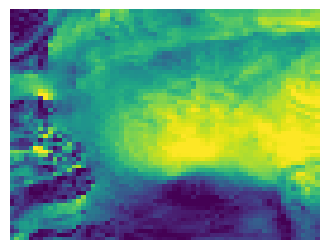

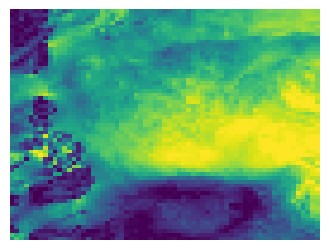

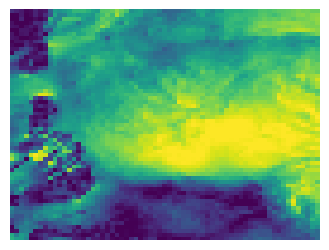

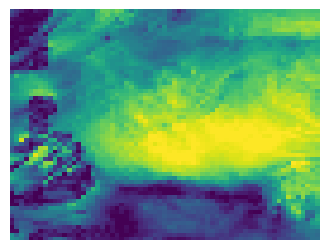

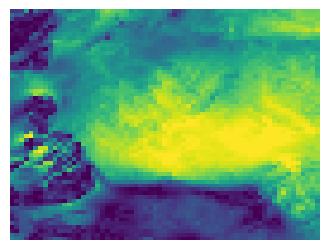

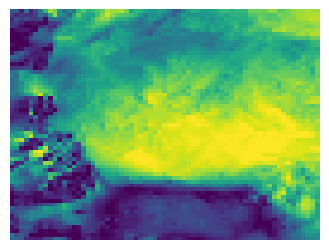

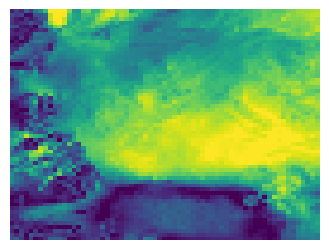

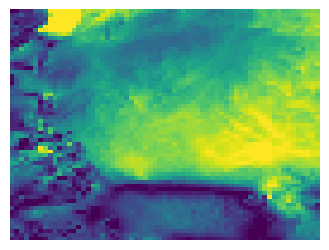

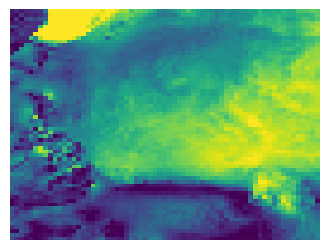

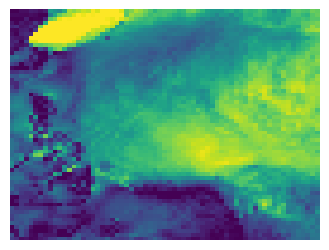

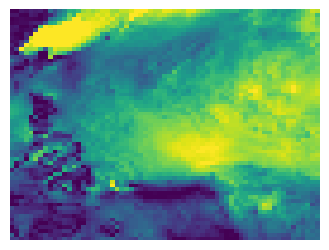

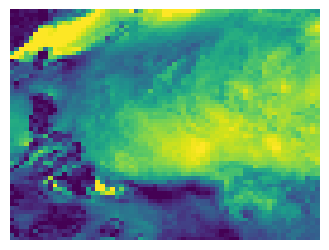

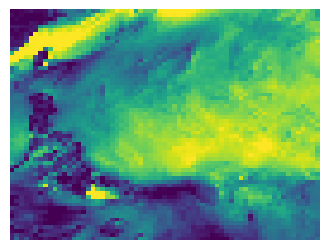

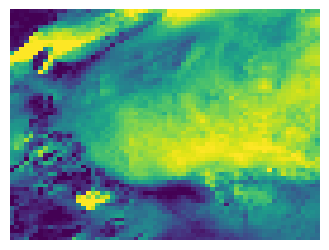

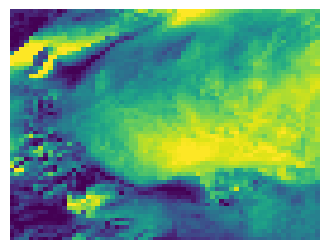

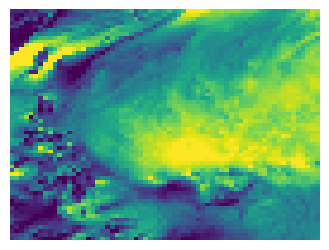

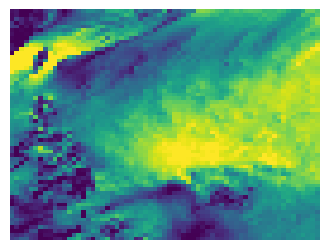

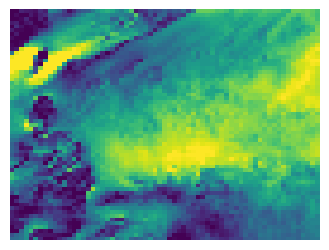

In [5]:
import os
time_list = tw_ds_windspeed.time
my_dpi = 96

output_path = "/Users/opopligher1996/workspace/master/BusinessIntelligenceTechniquesAndApplications_DSME6756/project/ConvLSTM-CNN-for-tropical-cyclone/Section_1/windspeed_timeseries/image_sequence"

for t in time_list.values:
    new_t = str(pd.to_datetime(t)).replace(" ","_").replace(":","_").replace("-","_")
    
    plt.figure(figsize=(400/my_dpi, 300/my_dpi), dpi=my_dpi)
    tw_ds_windspeed.sel(time = t).plot(robust=True,add_colorbar=False)
    plt.title("")
    plt.xlabel("")
    plt.ylabel("")
    plt.axis('off')
    output_name = new_t
    final_name = os.path.join(output_path , (output_name + '.jpg'))
    plt.savefig(final_name,dpi=my_dpi,bbox_inches = 'tight') #bbox_inches = 'tight'
    print("Save ",output_name,".jpg")
    #plt.show()

In [6]:
import gc
gc.collect()

87187

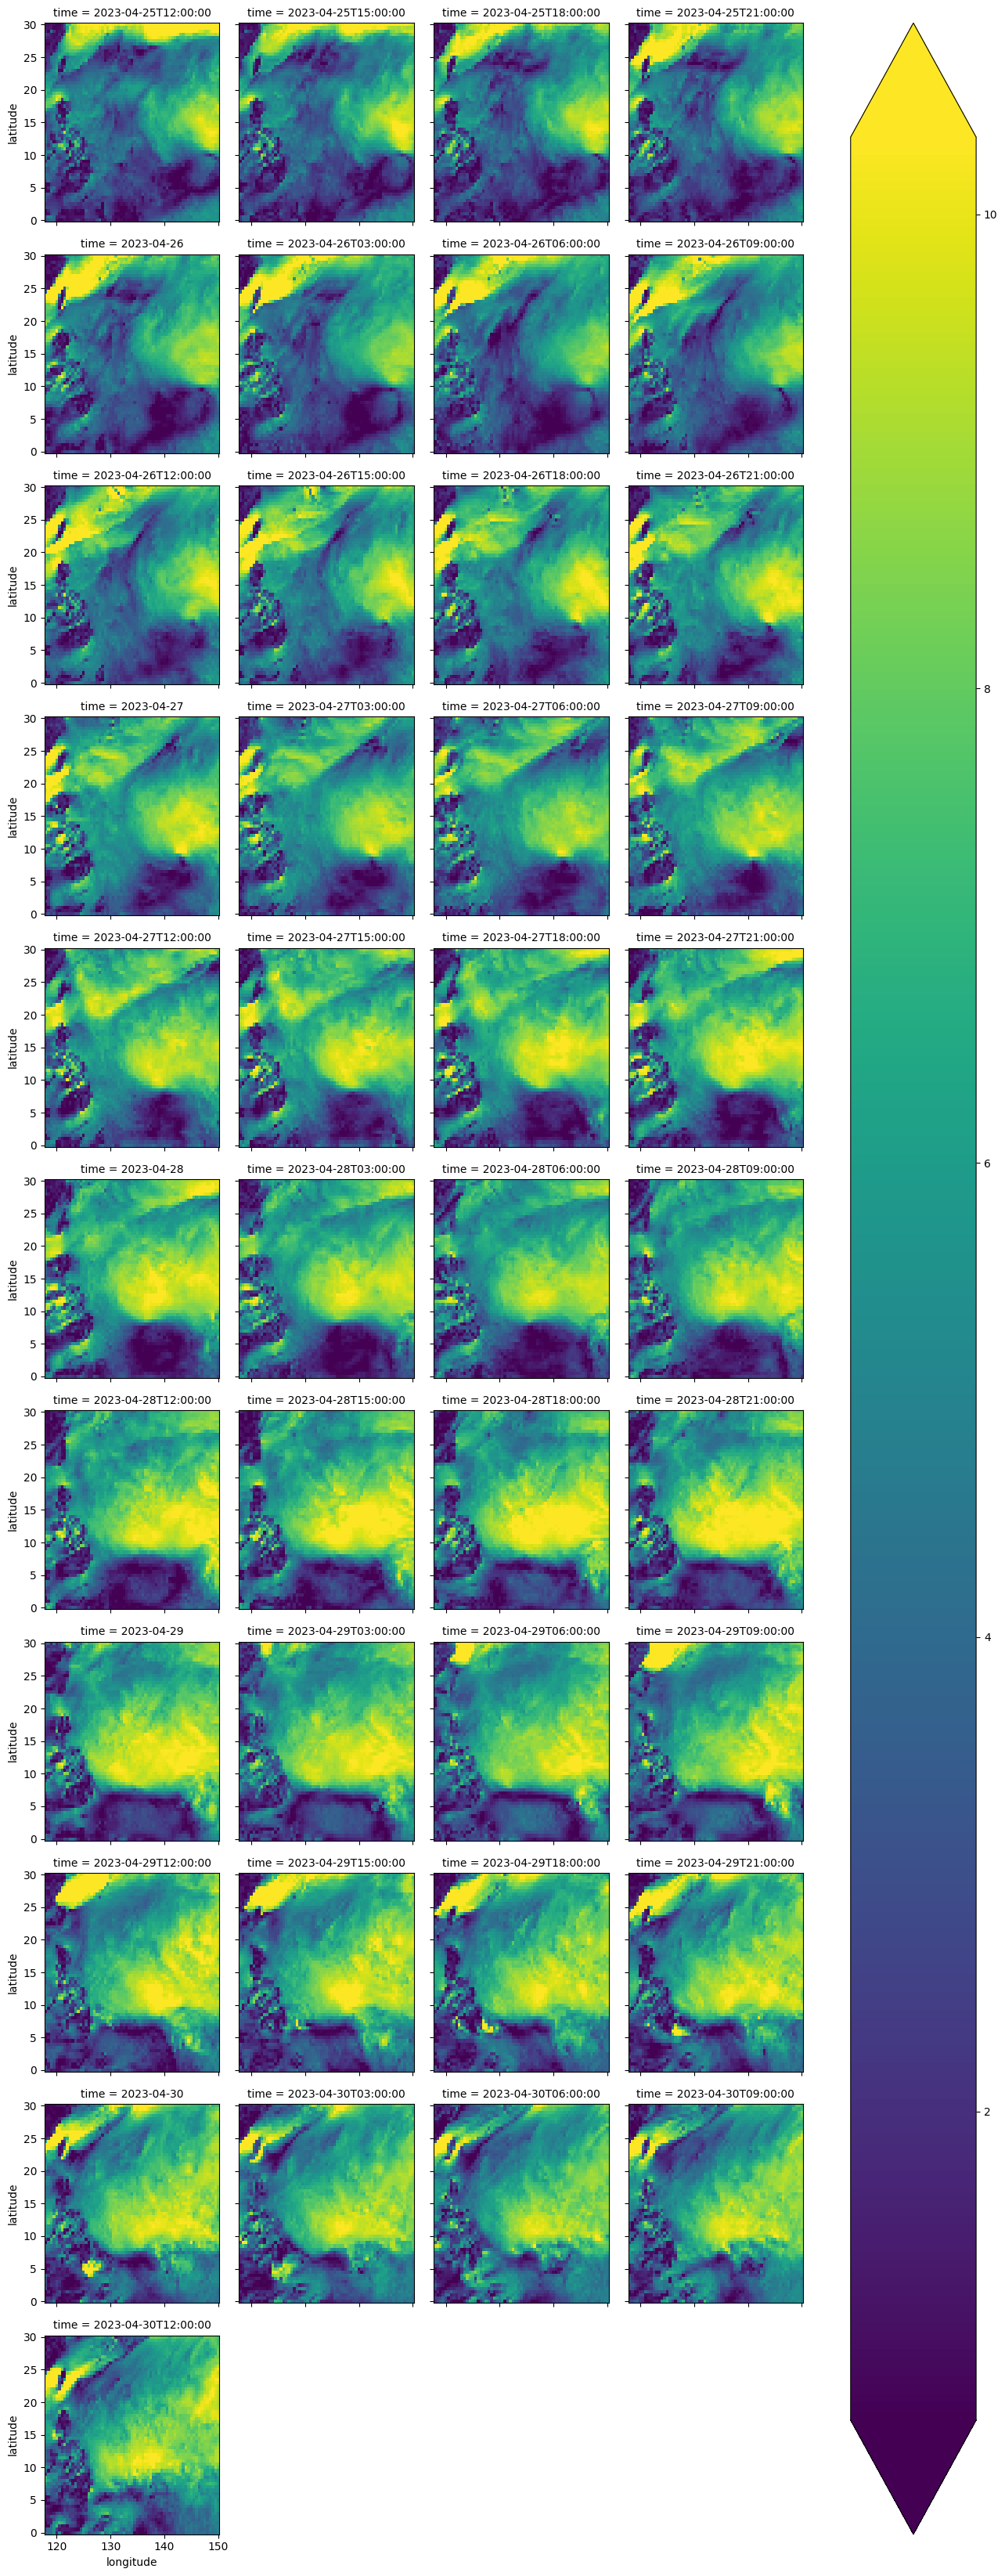

In [7]:
tw_ds_windspeed = ds_windspeed.sel(latitude=slice(0,40), longitude=slice(118,150),time=slice("2023-04-25", "2023-04-30"))
tw_ds_windspeed.plot(col="time", col_wrap=4, robust=True)

In [10]:
# Make dataset

import os
import cv2
from os.path import isfile, join


img_dir = "/Users/opopligher1996/workspace/master/BusinessIntelligenceTechniquesAndApplications_DSME6756/project/ConvLSTM-CNN-for-tropical-cyclone/Section_1/windspeed_timeseries/image_sequence"
suffix = '.jpg'
fname = os.listdir(img_dir)


images = []

for name in fname:
    
    fullpath = join(img_dir,name)
    
    if isfile(fullpath) and fullpath.endswith(suffix):
        img = cv2.imread(fullpath,0)
        images.append(img)
        print(name,' done')
    

    
images = np.array(images)
images = images.reshape((images.shape[0], images[0].shape[0], images[0].shape[1], 1))
print(images.shape)

2023_04_26_21_00_00.jpg  done
2023_04_30_03_00_00.jpg  done
2023_04_28_09_00_00.jpg  done
2023_04_27_12_00_00.jpg  done
2023_04_27_06_00_00.jpg  done
2023_04_26_00_00_00.jpg  done
2023_04_26_12_00_00.jpg  done
2023_04_29_09_00_00.jpg  done
2023_04_27_00_00_00.jpg  done
2023_04_26_06_00_00.jpg  done
2023_04_27_21_00_00.jpg  done
2023_04_26_15_00_00.jpg  done
2023_04_29_03_00_00.jpg  done
2023_04_26_18_00_00.jpg  done
2023_04_27_15_00_00.jpg  done
2023_04_27_18_00_00.jpg  done
2023_04_28_03_00_00.jpg  done
2023_04_30_09_00_00.jpg  done
2023_04_25_15_00_00.jpg  done
2023_04_28_06_00_00.jpg  done
2023_04_29_00_00_00.jpg  done
2023_04_25_18_00_00.jpg  done
2023_04_27_09_00_00.jpg  done
2023_04_28_12_00_00.jpg  done
2023_04_29_21_00_00.jpg  done
2023_04_28_21_00_00.jpg  done
2023_04_28_00_00_00.jpg  done
2023_04_29_06_00_00.jpg  done
2023_04_29_12_00_00.jpg  done
2023_04_26_09_00_00.jpg  done
2023_04_26_03_00_00.jpg  done
2023_04_29_18_00_00.jpg  done
2023_04_30_00_00_00.jpg  done
2023_04_25

In [11]:
# Save to npy
np.save("/Users/opopligher1996/workspace/master/BusinessIntelligenceTechniquesAndApplications_DSME6756/project/ConvLSTM-CNN-for-tropical-cyclone/Section_1/windspeed_timeseries/image_sequence/images.npy", images)
print("npy saved...")

npy saved...
